<h1>GRADED ASSIGNMENT</h1>

<H6>importing all necessary libraries</H6>

In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")



<h5>Loading dataset</h5>

In [2]:
from sklearn.datasets import load_wine
wine=load_wine()


df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
(df.isnull() | df.empty | df.isna()).sum()
#### There are no missing values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [5]:
freq=df['target'].value_counts()

In [6]:
freq

target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64

<Axes: xlabel='target'>

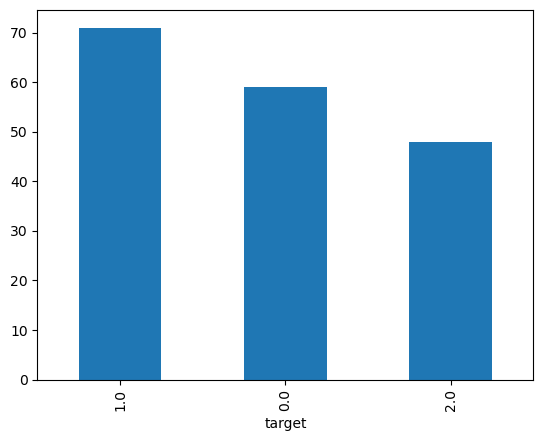

In [51]:
freq.plot(kind='bar')

<h6>preprocessing the data</h6>

In [3]:
from sklearn.preprocessing import StandardScaler

#Remove target columns.
x = df.loc[:,df.columns != 'target'].values
y = df.loc[:,['target']].values

#Scale the data
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(y)

<h3>Model building and evaluation</h3>

<h6>Function to view performance of every model</h6>

In [4]:


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, xTrain, xTest, yTrain, yTest, train=True):
    if train:
        pred = clf.predict(xTrain)
        clf_report = pd.DataFrame(classification_report(yTrain, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(yTrain, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(yTrain, pred)}\n")
        
    elif train==False:
        pred = clf.predict(xTest)
        clf_report = pd.DataFrame(classification_report(yTest, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(yTest, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(yTest, pred)}\n")

<h3>Decision tree</h3>

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.40, random_state = 42)
dt = DecisionTreeClassifier(max_depth=5,criterion='gini')
dt.fit(xTrain,yTrain)

DecisionTreeClassifier(max_depth=5)

In [10]:
y_pred = dt.predict(xTest)


In [12]:
print_score(dt, xTrain, xTest, yTrain, yTest, train=True)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    33.0  44.0  29.0       1.0      106.0         106.0
_______________________________________________
Confusion Matrix: 
 [[33  0  0]
 [ 0 44  0]
 [ 0  0 29]]



In [13]:
print_score(dt, xTrain, xTest, yTrain, yTest, train=False)

Test Result:
Accuracy Score: 94.44%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0        2.0  accuracy  macro avg  weighted avg
precision   0.958333   0.900000   1.000000  0.944444   0.952778      0.947454
recall      0.884615   1.000000   0.947368  0.944444   0.943995      0.944444
f1-score    0.920000   0.947368   0.972973  0.944444   0.946780      0.944242
support    26.000000  27.000000  19.000000  0.944444  72.000000     72.000000
_______________________________________________
Confusion Matrix: 
 [[23  3  0]
 [ 0 27  0]
 [ 1  0 18]]



In [98]:
scores = cross_val_score(dt, xTrain, yTrain, cv = 10)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [1.         0.90909091 1.         0.90909091 0.81818182 0.90909091
 0.8        1.         1.         0.8       ]
Average cross-validation score: 0.9145454545454547


<h3>Decision tree classifier hyperparameter tuning using GridSearchCV</h3>

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)
tree_cv.fit(xTrain, yTrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(xTrain, yTrain)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(max_depth=1)

In [97]:
y_pred = tree_clf.predict(xTest)


In [99]:
print_score(tree_clf, xTrain, xTest, yTrain, yTest, train=True)

Train Result:
Accuracy Score: 71.70%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0   2.0  accuracy   macro avg  weighted avg
precision   0.923077   0.597015   0.0  0.716981    0.506697      0.576176
recall      0.923077   0.952381   0.0  0.716981    0.625153      0.716981
f1-score    0.923077   0.733945   0.0  0.716981    0.552341      0.630431
support    39.000000  42.000000  25.0  0.716981  106.000000    106.000000
_______________________________________________
Confusion Matrix: 
 [[36  3  0]
 [ 2 40  0]
 [ 1 24  0]]



In [100]:
print_score(tree_clf, xTrain, xTest, yTrain, yTest, train=False)

Test Result:
Accuracy Score: 58.33%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0   2.0  accuracy  macro avg  weighted avg
precision   0.933333   0.491228   0.0  0.583333   0.474854      0.457115
recall      0.700000   0.965517   0.0  0.583333   0.555172      0.583333
f1-score    0.800000   0.651163   0.0  0.583333   0.483721      0.484496
support    20.000000  29.000000  23.0  0.583333  72.000000     72.000000
_______________________________________________
Confusion Matrix: 
 [[14  6  0]
 [ 1 28  0]
 [ 0 23  0]]



<h2>Random forest</h2>

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.40, random_state = 50)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=50)
rf.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=10, random_state=50)

In [6]:
y_pred = rf.predict(xTest)


In [7]:
print_score(rf, xTrain, xTest, yTrain, yTest, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    39.0  42.0  25.0       1.0      106.0         106.0
_______________________________________________
Confusion Matrix: 
 [[39  0  0]
 [ 0 42  0]
 [ 0  0 25]]



In [8]:
print_score(rf, xTrain, xTest, yTrain, yTest, train=False)

Test Result:
Accuracy Score: 97.22%
_______________________________________________
CLASSIFICATION REPORT:
             0.0        1.0   2.0  accuracy  macro avg  weighted avg
precision   0.95   0.965517   1.0  0.972222   0.971839      0.972222
recall      0.95   0.965517   1.0  0.972222   0.971839      0.972222
f1-score    0.95   0.965517   1.0  0.972222   0.971839      0.972222
support    20.00  29.000000  23.0  0.972222  72.000000     72.000000
_______________________________________________
Confusion Matrix: 
 [[19  1  0]
 [ 1 28  0]
 [ 0  0 23]]



In [16]:
scores = cross_val_score(rf, xTrain, yTrain, cv = 10)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [1.         1.         1.         1.         0.81818182 1.
 0.9        1.         1.         1.        ]
Average cross-validation score: 0.9718181818181819


<h3>Random forest: Hyperparameter tuning using random search cv</h3>

In [17]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}
rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(xTrain, yTrain)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(xTrain, yTrain)



Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=400)

In [19]:
y_pred = rf_clf.predict(xTest)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yTest, y_pred)
ac = accuracy_score(yTest, y_pred) 

In [20]:
print("confusion matrix:")
print(cm)

confusion matrix:
[[18  2  0]
 [ 1 28  0]
 [ 0  0 23]]


In [22]:
print("accuracy score is:" ,ac)

accuracy score is: 0.9583333333333334


<h3>Adaboost Classifier</h3>

In [107]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)

In [109]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model = abc.fit(xTrain, yTrain)
y_pred = model.predict(xTest)

In [110]:
print_score(model, xTrain, xTest, yTrain, yTest, train=True)

Train Result:
Accuracy Score: 94.35%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0        2.0  accuracy   macro avg  weighted avg
precision   0.957447   0.956522   0.903226  0.943548    0.939065      0.944838
recall      0.957447   0.897959   1.000000  0.943548    0.951802      0.943548
f1-score    0.957447   0.926316   0.949153  0.943548    0.944305      0.943272
support    47.000000  49.000000  28.000000  0.943548  124.000000    124.000000
_______________________________________________
Confusion Matrix: 
 [[45  2  0]
 [ 2 44  3]
 [ 0  0 28]]



In [111]:
print_score(model, xTrain, xTest, yTrain, yTest, train=False)

Test Result:
Accuracy Score: 92.59%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0        2.0  accuracy  macro avg  weighted avg
precision   0.916667   0.950000   0.909091  0.925926   0.925253      0.927441
recall      0.916667   0.863636   1.000000  0.925926   0.926768      0.925926
f1-score    0.916667   0.904762   0.952381  0.925926   0.924603      0.925044
support    12.000000  22.000000  20.000000  0.925926  54.000000     54.000000
_______________________________________________
Confusion Matrix: 
 [[11  1  0]
 [ 1 19  2]
 [ 0  0 20]]



In [112]:
scores = cross_val_score(model, xTrain, yTrain, cv = 10)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.84615385 1.         0.92307692 0.92307692 0.5        0.83333333
 0.75       1.         0.58333333 0.91666667]
Average cross-validation score: 0.8275641025641025


<h3>Lightgbm Classifier</h3>

In [114]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)

In [116]:
!pip3 install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 762.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 654.9 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 748.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 885.4 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 948.8 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 948.8 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 838.1 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 834.5 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.4 MB 860.2 kB/s eta 0:0

In [118]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(xTrain, yTrain)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 13
[LightGBM] [Info] Start training from score -1.059081
[LightGBM] [Info] Start training from score -0.991640
[LightGBM] [Info] Start training from score -1.264934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

LGBMClassifier()

In [119]:
y_pred=clf.predict(xTest)

In [120]:
print_score(clf, xTrain, xTest, yTrain, yTest, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    43.0  46.0  35.0       1.0      124.0         124.0
_______________________________________________
Confusion Matrix: 
 [[43  0  0]
 [ 0 46  0]
 [ 0  0 35]]



In [121]:
print_score(clf, xTrain, xTest, yTrain, yTest, train=False)

Test Result:
Accuracy Score: 98.15%
_______________________________________________
CLASSIFICATION REPORT:
            0.0        1.0        2.0  accuracy  macro avg  weighted avg
precision   1.0   1.000000   0.928571  0.981481   0.976190      0.982804
recall      1.0   0.960000   1.000000  0.981481   0.986667      0.981481
f1-score    1.0   0.979592   0.962963  0.981481   0.980852      0.981635
support    16.0  25.000000  13.000000  0.981481  54.000000     54.000000
_______________________________________________
Confusion Matrix: 
 [[16  0  0]
 [ 0 24  1]
 [ 0  0 13]]



In [122]:
scores = cross_val_score(clf, xTrain, yTrain, cv = 10)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 111, number of used features: 13
[LightGBM] [Info] Start training from score -1.071944
[LightGBM] [Info] Start training from score -0.995958
[LightGBM] [Info] Start training from score -1.243794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

<h3>XG-Boost Classifier</h3>

In [126]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [127]:
pip install --user xgboost

Note: you may need to restart the kernel to use updated packages.


In [130]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33,random_state=7)
from xgboost import XGBClassifier
xb=XGBClassifier(use_label_encoder=False,eval_metric="mlogloss")
mxb=xb.fit(xTrain,yTrain)
y_pred=mxb.predict(xTest)

In [131]:
print_score(mxb, xTrain, xTest, yTrain, yTest, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    45.0  44.0  30.0       1.0      119.0         119.0
_______________________________________________
Confusion Matrix: 
 [[45  0  0]
 [ 0 44  0]
 [ 0  0 30]]



In [132]:
print_score(mxb, xTrain, xTest, yTrain, yTest, train=False)

Test Result:
Accuracy Score: 96.61%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0        2.0  accuracy  macro avg  weighted avg
precision   0.933333   0.962963   1.000000  0.966102   0.965432      0.967232
recall      1.000000   0.962963   0.944444  0.966102   0.969136      0.966102
f1-score    0.965517   0.962963   0.971429  0.966102   0.966636      0.966152
support    14.000000  27.000000  18.000000  0.966102  59.000000     59.000000
_______________________________________________
Confusion Matrix: 
 [[14  0  0]
 [ 1 26  0]
 [ 0  1 17]]



In [133]:
scores = cross_val_score(mxb, xTrain, yTrain, cv = 10)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.91666667 1.         0.91666667 1.         1.         0.83333333
 0.91666667 1.         1.         0.90909091]
Average cross-validation score: 0.949242424242424


<h3>Catboost Classifier</h3>

In [135]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 975.2 kB/s eta 0:01:44
   ---------------------------------------- 0.1/101.1 MB 1.1 MB/s eta 0:01:31
   ---------------------------------------- 0.2/101.1 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 0.3/101.1 MB 1.4 MB/s eta 0:01:15
   ---------------------------------------- 0.4/101.1 MB 1.4 MB/s eta 0:01:11
   ---------------------------------------- 0.5/101.1 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0.5/101.1 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.6/101.1 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.7/101.1 MB 1.5 MB/s eta 0:01:09
   ---------------------------------------- 0.8/101.1 MB 1.6 MB/s eta 0:01:0

In [136]:

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33,random_state=7)
clf = CatBoostClassifier(iterations=10)
clf.fit(xTrain,yTrain)
y_pred=clf.predict(xTest)

Learning rate set to 0.5
0:	learn: 0.7210831	total: 156ms	remaining: 1.4s
1:	learn: 0.5338611	total: 163ms	remaining: 653ms
2:	learn: 0.4009199	total: 170ms	remaining: 397ms
3:	learn: 0.3187552	total: 177ms	remaining: 266ms
4:	learn: 0.2496199	total: 184ms	remaining: 184ms
5:	learn: 0.2155344	total: 191ms	remaining: 127ms
6:	learn: 0.1845478	total: 197ms	remaining: 84.6ms
7:	learn: 0.1546092	total: 206ms	remaining: 51.6ms
8:	learn: 0.1371110	total: 213ms	remaining: 23.7ms
9:	learn: 0.1192531	total: 220ms	remaining: 0us


In [137]:
print_score(clf, xTrain, xTest, yTrain, yTest, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    45.0  44.0  30.0       1.0      119.0         119.0
_______________________________________________
Confusion Matrix: 
 [[45  0  0]
 [ 0 44  0]
 [ 0  0 30]]



In [138]:
print_score(clf, xTrain, xTest, yTrain, yTest, train=False)

Test Result:
Accuracy Score: 96.61%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0   2.0  accuracy  macro avg  weighted avg
precision   0.875000   1.000000   1.0  0.966102   0.958333      0.970339
recall      1.000000   0.925926   1.0  0.966102   0.975309      0.966102
f1-score    0.933333   0.961538   1.0  0.966102   0.964957      0.966580
support    14.000000  27.000000  18.0  0.966102  59.000000     59.000000
_______________________________________________
Confusion Matrix: 
 [[14  0  0]
 [ 2 25  0]
 [ 0  0 18]]



<h2>KNN Classifier</h2>

<h5>splitting data into training and test data</h5>

In [140]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20,random_state=0)

<h5>Feature scaling</h5>

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(xTrain)
X_test = sc.transform(xTest)

<h5>Training the K-NN model on the Training set</h5>

In [146]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, yTrain)



KNeighborsClassifier()

<h5>printing accuracy</h5>

In [147]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yTest, y_pred)
ac = accuracy_score(yTest, y_pred) 

In [151]:
print("Confusion matrix")
print(cm )

Confusion matrix
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


In [150]:
print("Accuracy score is:" , ac)

Accuracy score is: 0.9722222222222222
